# OT with Laplacian regularization for domain adaptation

In [1]:
import matplotlib.pylab as pl
import ot
import pandas as pd

In [2]:
source_dataset = pd.read_csv("PCA_BRCA_TCGA_allSubtypes_logcounts_christine.csv")
target_dataset = pd.read_csv("PCA_CD44_logcounts_christine.csv")

In [3]:
# PC3 and PC4 for TCGA (note 12 samples have NA subtype annotation)
# PC2 and PC3 luminal vs basal in Christines data
# PC4 and PC5 for christine's data

In [4]:
print(source_dataset.shape)
print(target_dataset.shape)

(1102, 1104)
(18, 20)


In [5]:
Xs = source_dataset.iloc[:,3:7].as_matrix()
ys = source_dataset['subtype'].as_matrix()

Xt = target_dataset.iloc[:,2:6].as_matrix()
yt = target_dataset['label'].as_matrix()

/stornext/System/data/apps/anaconda3/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/stornext/System/data/apps/anaconda3/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/stornext/System/data/apps/anaconda3/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/stornext/System/data/apps/anaconda3/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


Xt = source_dataset.iloc[:,3:5].as_matrix()
yt = source_dataset['subtype'].as_matrix()

Xs = target_dataset.iloc[:,4:6].as_matrix()
ys = target_dataset['label'].as_matrix()

In [6]:
target_dataset.iloc[:,2:6].head()

,PC2,PC3,PC4,PC5
0,-28.564816,-81.132959,0.202206,-21.076200
1,-7.277740,-16.110980,3.875250,-22.713168
2,-18.452815,-61.568560,1.786208,-30.009503
3,-33.381098,-53.369523,-14.126116,15.842111
4,-35.962456,-72.705086,-13.839114,7.080505


In [7]:
source_dataset.iloc[:,3:7].head()

,PC3,PC4,PC5,PC6
0,55.127292,-54.954970,7.849066,-13.785901
1,-8.518872,48.731035,26.412632,20.564994
2,-6.946121,-61.766724,33.154074,-1.539342
3,-10.306875,24.444978,20.717546,-5.862698
4,21.993697,-4.056397,-10.130687,4.432868


In [8]:
# EMD Transport
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xs, Xt=Xt)

# Sinkhorn Transport
ot_sinkhorn = ot.da.SinkhornTransport(reg_e=.01)
ot_sinkhorn.fit(Xs=Xs, Xt=Xt)

# EMD Transport with Laplacian regularization
ot_emd_laplace = ot.da.EMDLaplaceTransport(reg_lap=100, reg_src=1)
ot_emd_laplace.fit(Xs=Xs, Xt=Xt)

# transport source samples onto target samples
transp_Xs_emd = ot_emd.transform(Xs=Xs)
transp_Xs_sinkhorn = ot_sinkhorn.transform(Xs=Xs)
transp_Xs_emd_laplace = ot_emd_laplace.transform(Xs=Xs)

/home/hediyehzadeh.s/.local/lib/python3.6/site-packages/ot/bregman.py:363: RuntimeWarning: divide by zero encountered in true_divide
  v = np.divide(b, KtransposeU)


/home/hediyehzadeh.s/.local/lib/python3.6/site-packages/ot/da.py:1048: RuntimeWarning: invalid value encountered in true_divide
  transp = self.coupling_ / np.sum(self.coupling_, 1)[:, None]


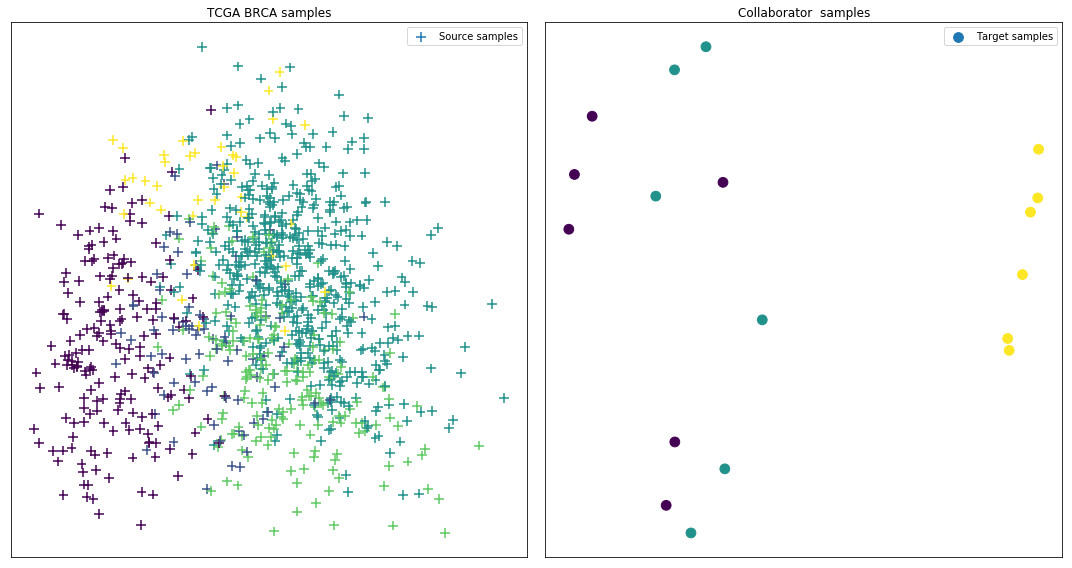

In [12]:
pl.figure(1, figsize=(15, 8))
pl.subplot(1, 2, 1)
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples',s=95)
pl.xticks([])
pl.yticks([])
pl.legend(loc=0)
pl.title('TCGA BRCA samples')

pl.subplot(1, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples',s=95)
pl.xticks([])
pl.yticks([])
pl.legend(loc=0)

pl.title('Collaborator  samples')
#pl.savefig("ChristineCD44_source_target_samples_allTCGAsubtypes.png")
pl.tight_layout()


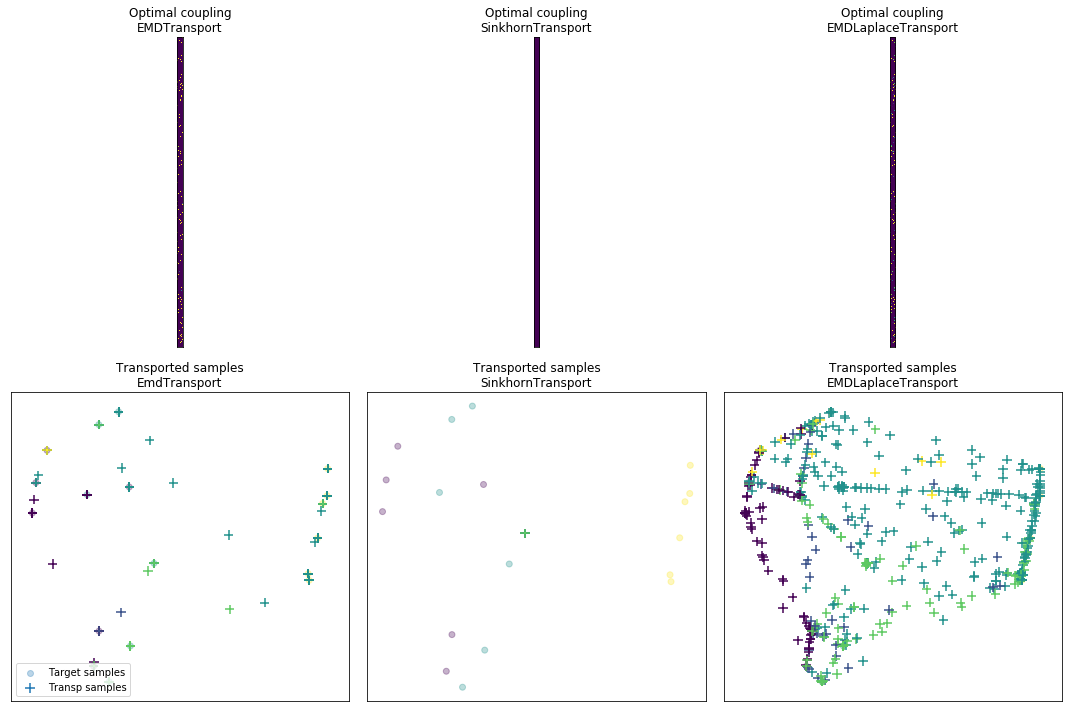

In [13]:
param_img = {'interpolation': 'nearest'}

pl.figure(2, figsize=(15, 10))
pl.subplot(2, 3, 1)
pl.imshow(ot_emd.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nEMDTransport')

pl.figure(2, figsize=(15, 8))
pl.subplot(2, 3, 2)
pl.imshow(ot_sinkhorn.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSinkhornTransport')

pl.subplot(2, 3, 3)
pl.imshow(ot_emd_laplace.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nEMDLaplaceTransport')

pl.subplot(2, 3, 4)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_emd[:, 0], transp_Xs_emd[:, 1], 
           marker='+', c= ys ,label='Transp samples', s=90)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nEmdTransport')
pl.legend(loc="lower left")

pl.subplot(2, 3, 5)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_sinkhorn[:, 0], transp_Xs_sinkhorn[:, 1],
           marker='+', c= ys, label='Transp samples', s=90)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nSinkhornTransport')

pl.subplot(2, 3, 6)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_emd_laplace[:, 0], transp_Xs_emd_laplace[:, 1], 
           marker='+', c= ys, label='Transp samples', s=90)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nEMDLaplaceTransport')
pl.tight_layout()
#pl.savefig("ChristineCD44_TCGA_couplings_and_transport.png")
pl.show()

In [14]:
#pd.DataFrame(ot_emd_laplace.coupling_).to_csv("Transported_samples_EMDLaplaceTransport_coupling_allSubtypesAnalysis_4D.csv")
#pd.DataFrame(transp_Xs_emd_laplace).to_csv("Transported_samples_EMDLaplaceTransport_allSubtypesAnalysis_4D.csv")

In [15]:
import ot.plot
#pl.figure(4, figsize=(15, 8))
#ot.plot.plot2D_samples_mat(Xs, Xt, ot_emd_laplace.coupling_, c=[.5, .5, 1])
#pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
#pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
#pl.xticks([])
#pl.yticks([])
#pl.title('Main coupling coefficients\nEMDLaplaceTransport')

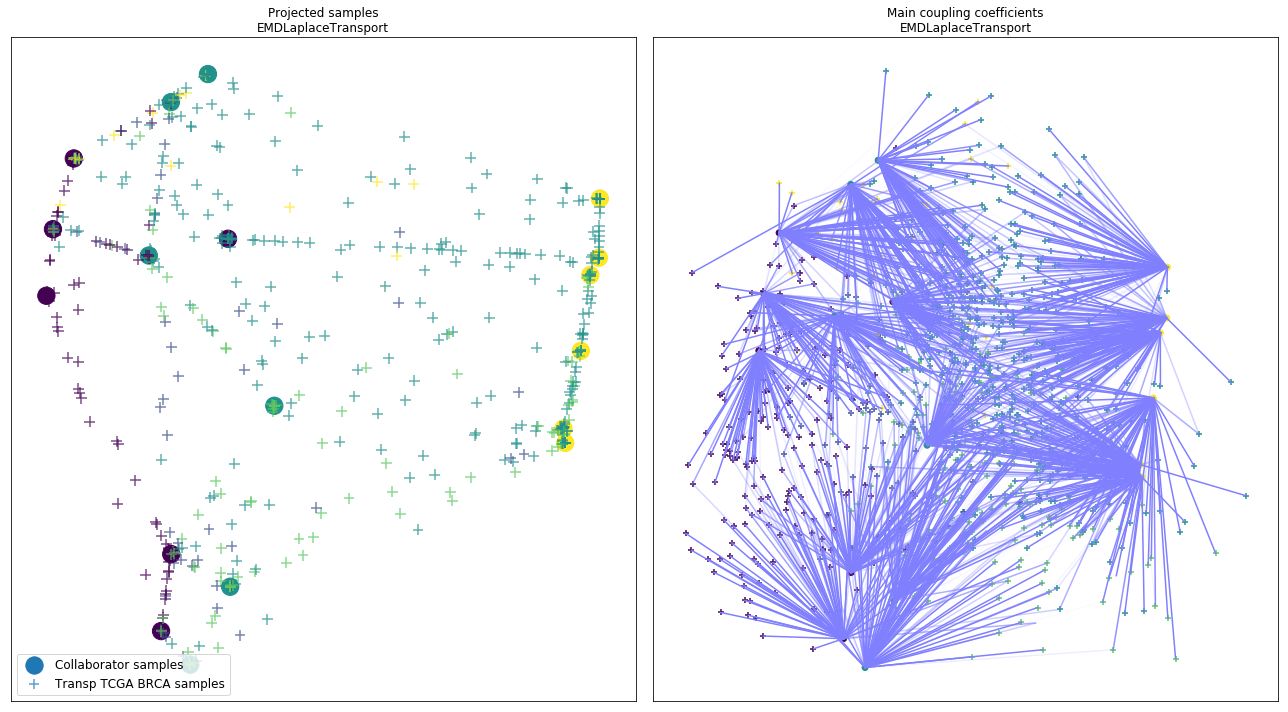

In [18]:
# repeat the above figure
param_img = {'interpolation': 'nearest'}

pl.figure(3, figsize=(18, 10))

pl.subplot(1, 2, 1)

pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Collaborator samples',s= 300)
pl.scatter(transp_Xs_emd_laplace[:, 0], transp_Xs_emd_laplace[:, 1], 
           marker='+', alpha=0.7, s=120, c= ys, label='Transp TCGA BRCA samples')
pl.xticks([])
pl.yticks([])
pl.title('Projected samples\nEMDLaplaceTransport')
pl.legend(loc="lower left", fontsize="large")



pl.subplot(1, 2, 2)
ot.plot.plot2D_samples_mat(Xs, Xt, ot_emd_laplace.coupling_, c=[.5, .5, 1])
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='TCGA BRCA samples')
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Collaborator samples')
pl.xticks([])
pl.yticks([])
pl.title('Main coupling coefficients\nEMDLaplaceTransport')
pl.tight_layout()
pl.savefig("ChristineCD44_TCGA_transport_EMDs_allTCGAsubtypes.png")
pl.show()

# OT for domain adaptation 

In [ ]:
# EMD Transport
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xt, Xt=Xs)

# Sinkhorn Transport
ot_sinkhorn = ot.da.SinkhornTransport(reg_e=1e-1)
ot_sinkhorn.fit(Xs=Xt, Xt=Xs)

# Sinkhorn Transport with Group lasso regularization
ot_lpl1 = ot.da.SinkhornLpl1Transport(reg_e=1e-1, reg_cl=1e0)
ot_lpl1.fit(Xs=Xt, ys=yt, Xt=Xs)

# Sinkhorn Transport with Group lasso regularization l1l2
ot_l1l2 = ot.da.SinkhornL1l2Transport(reg_e=1e-1, reg_cl=2e0, max_iter=20,
                                      verbose=True)
ot_l1l2.fit(Xs=Xt, ys=yt, Xt=Xs)

# transport source samples onto target samples
transp_Xs_emd = ot_emd.transform(Xs=Xt)
transp_Xs_sinkhorn = ot_sinkhorn.transform(Xs=Xt)
transp_Xs_lpl1 = ot_lpl1.transform(Xs=Xt)
transp_Xs_l1l2 = ot_l1l2.transform(Xs=Xt)

In [ ]:
pl.figure(1, figsize=(10, 5))
pl.subplot(1, 2, 1)
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
pl.xticks([])
pl.yticks([])
pl.legend(loc=0)
pl.title('Source  samples')

pl.subplot(1, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
pl.xticks([])
pl.yticks([])
pl.legend(loc=0)
pl.title('Target samples')
pl.tight_layout()

In [ ]:
param_img = {'interpolation': 'nearest'}

pl.figure(2, figsize=(15, 8))
pl.subplot(2, 4, 1)
pl.imshow(ot_emd.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nEMDTransport')

pl.subplot(2, 4, 2)
pl.imshow(ot_sinkhorn.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSinkhornTransport')

pl.subplot(2, 4, 3)
pl.imshow(ot_lpl1.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSinkhornLpl1Transport')

pl.subplot(2, 4, 4)
pl.imshow(ot_l1l2.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSinkhornL1l2Transport')

pl.subplot(2, 4, 5)
pl.scatter(Xs[:, 0], Xs[:, 1],  marker='o', c= ys,
           label='Target samples', alpha=0.3, s=90)
pl.scatter(transp_Xs_emd[:, 0], transp_Xs_emd[:, 1], c=yt,
           marker='+', label='Transp samples', s=90)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nEmdTransport')
pl.legend(loc="lower left")

pl.subplot(2, 4, 6)
pl.scatter(Xs[:, 0], Xs[:, 1], marker='o', c= ys,
           label='Target samples', alpha=0.3, s=90)
pl.scatter(transp_Xs_sinkhorn[:, 0], transp_Xs_sinkhorn[:, 1], c=yt,
           marker='+', label='Transp samples', s=90)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nSinkhornTransport')

pl.subplot(2, 4, 7)
pl.scatter(Xs[:, 0], Xs[:, 1], marker='o',c=ys,
           label='Target samples', alpha=0.3, s=90)
pl.scatter(transp_Xs_lpl1[:, 0], transp_Xs_lpl1[:, 1], c=yt,
           marker='+', label='Transp samples', s=90)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nSinkhornLpl1Transport')

pl.subplot(2, 4, 8)
pl.scatter(Xs[:, 0], Xs[:, 1],  marker='o', c=ys,
           label='Target samples', alpha=0.3, s=90)
pl.scatter(transp_Xs_l1l2[:, 0], transp_Xs_l1l2[:, 1], c=yt,
           marker='+', label='Transp samples', s=90)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nSinkhornL1l2Transport')
pl.tight_layout()

pl.show()

In [ ]:
pl.figure(3, figsize=(15, 8))
pl.scatter(Xs[:, 0], Xs[:, 1],  marker='o', c= ys,
           label='Target samples', alpha=0.3, s=90)
pl.scatter(transp_Xs_emd[:, 0], transp_Xs_emd[:, 1], c=yt,
           marker='+', label='Transp samples', s=90)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nEmdTransport')
pl.legend(loc="lower left")

